In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd

In [26]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [28]:
engine =  create_engine('sqlite:///hawaii.sqlite')

In [29]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [30]:
# We can view all the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [31]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

      date  precipitation
2016-08-23           0.00
2016-08-23           0.00
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24           0.00
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27           0.00
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

<Figure size 1440x432 with 0 Axes>

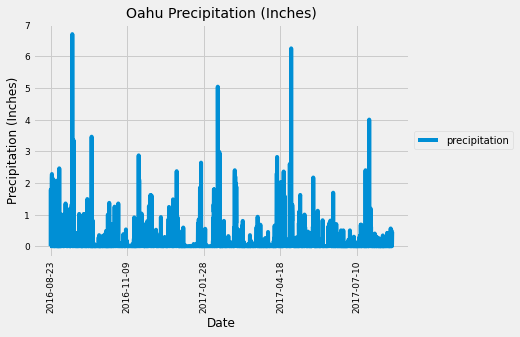

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df.sort_index(inplace=True)
# df.reset_index(inplace=True)
# Fill null with 0
df['precipitation'] = df['precipitation'].fillna(0.00)
print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(20,6))

df.plot()
plt.xticks(rotation = 90, size = 9)
plt.yticks(size = 9)
plt.legend(fontsize = 10, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Oahu Precipitation (Inches)",fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Precipitation (Inches)",fontsize=12)
plt.savefig('Charts/Oahu_Precipitation.jpg', dpi = 600,bbox_inches='tight')
plt.savefig('Charts/Oahu_Precipitation.png', dpi = 600,bbox_inches='tight')

In [34]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [35]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [36]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# Calculate the highest temperature recorded, and average temperature most active station
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

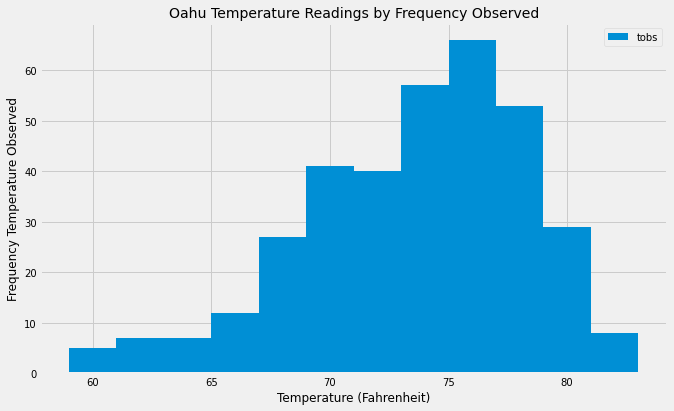

In [41]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
tobs_df = pd.DataFrame(results, columns=['tobs'])

tobs_df.plot.hist(bins=12, figsize=(10,6))
plt.title('Oahu Temperature Readings by Frequency Observed', fontsize = 14)
plt.xlabel("Temperature (Fahrenheit)", fontsize=12)
plt.ylabel("Frequency Temperature Observed",fontsize=12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.legend(fontsize = 10)
plt.savefig('Charts/Oahu_Temperature_Readings.jpg', dpi = 600,bbox_inches='tight')
plt.savefig('Charts/Oahu_Temperature_Readings.png', dpi = 600,bbox_inches='tight')

In [23]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

# Create min temp function
def calc_temps_min(date1, date2):
    c_result_min = session.query(func.min(Measurement.tobs)).\
        filter(Measurement.date >= date1).\
        filter(Measurement.date <= date2).all()
    return c_result_min

# Create average temperature function
def calc_temps_avg(date1, date2):
    c_result_avg = session.query(func.avg(Measurement.tobs)).\
                                 filter(Measurement.date >= date1).\
                                 filter(Measurement.date <= date2).all()
    return c_result_avg

# Create maximum temperature function
def calc_temps_max(date1, date2):
    c_result_max = session.query(func.max(Measurement.tobs)).\
                                 filter(Measurement.date >= date1).\
                                 filter(Measurement.date <= date2).all()
    return c_result_max
# Create date range inputs
date1 = input("What is your start date in yyyy-mm-dd? \n")
date2 = input("What is your end date in yyyy-mm-dd? \n")

# Create if statement to return error if no result occurred
if calc_temps_min(date1, date2) == [(None,)]:
    print(f'Check your date format and date range')
elif calc_temps_avg(date1, date2) == [(None,)]:
    print(f'Check your date format and date range')
elif calc_temps_max(date1, date2) == [(None,)]:
    print(f'Check your date format and date range')
else:
    print(f'For the given date range:\nThe minimum temperature was: {calc_temps_min(date1, date2)[0][0]:.1f}\u00b0F\nThe average temperature was: {calc_temps_avg(date1, date2)[0][0]:.1f}\u00b0F\nThe maximum temperature was: {calc_temps_max(date1, date2)[0][0]:.1f}\u00b0F')

For the given date range:
The minimum temperature was: 58.0°F
The average temperature was: 72.0°F
The maximum temperature was: 83.0°F


# Challenge